[How to Improve Performance With Transfer Learning for Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/)

In [ ]:
# plot of blobs multiclass classification problems 1 and 2
from sklearn.datasets.samples_generator import make_blobs
from numpy import where
from matplotlib import pyplot
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

%matplotlib inline

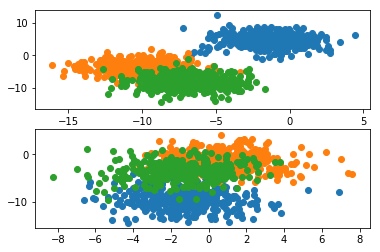

In [3]:
# generate samples for blobs problem with a given random seed
def samples_for_seed(seed):
	# generate samples
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
	return X, y

# create a scatter plot of points colored by class value
def plot_samples(X, y, classes=3):
	# plot points for each class
	for i in range(classes):
		# select indices of points with each class label
		samples_ix = where(y == i)
		# plot points for this class with a given color
		pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])

# generate multiple problems
n_problems = 2
for i in range(1, n_problems+1):
	# specify subplot
	pyplot.subplot(210 + i)
	# generate samples
	X, y = samples_for_seed(i)
	# scatter plot of samples
	plot_samples(X, y)
# plot figure
pyplot.show()

In [ ]:
# prepare a blobs examples with a given random seed
def samples_for_seed(seed):
	# generate samples
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=seed)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# define and fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
	return model, history

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	# plot loss during training
	pyplot.subplot(211)
	pyplot.title('Loss')
	pyplot.plot(history.history['loss'], label='train')
	pyplot.plot(history.history['val_loss'], label='test')
	pyplot.legend()
	# plot accuracy during training
	pyplot.subplot(212)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['acc'], label='train')
	pyplot.plot(history.history['val_acc'], label='test')
	pyplot.legend()
	pyplot.show()

# prepare data
trainX, trainy, testX, testy = samples_for_seed(1)
# fit model on train dataset
model, history = fit_model(trainX, trainy, testX, testy)
# evaluate model behavior
summarize_model(model, history, trainX, trainy, testX, testy)
# save model to file
model.save('model.h5')